# RDS Homework 2 Template
## Spring 2024


In [1]:
!pip install shap

In [2]:
from __future__ import print_function

import shap
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Configs
np.random.seed(1)
shap.initjs()
sns.set_style("whitegrid")

plot_shap=True # NOTE: Turn False to disable shap plots as they can be slow to load

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Problem 3

### Part (A)

In [3]:
# Mark the categories of interest
categories = ['alt.atheism', 'soc.religion.christian']

# Fetch the data
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Set outcome class names
class_names = ['atheism', 'christian']

In [4]:
corpus_train = newsgroups_train.data
y_train = newsgroups_train.target
corpus_test = newsgroups_test.data
y_test = newsgroups_test.target

In [5]:
# Initialize & fit tf-idf vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

In [6]:
# Train & fit the classifier
sgd = SGDClassifier(loss = 'log_loss', random_state = 22)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=22)

In [7]:
y_prob = sgd.predict_proba(X_test)
y_pred = sgd.predict(X_test)

### Part (B)

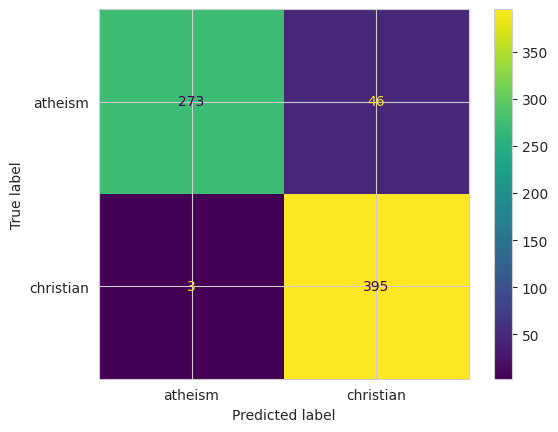

In [9]:
# Confusion Matrix
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels = class_names)
plt.show()

#### Explainer

In [10]:
# Initialize the explainer and apply to test data
explainer = shap.LinearExplainer(sgd, X_train, feature_perturbation = 'interventional')
explainer.feature_names = vectorizer.get_feature_names_out()
explanation = explainer(X_test)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [29]:
# Select 5 documents in the test set for explanation
X_test_array = X_test.toarray()

selected_idx = [54, 94, 256, 389, 554]


Document index: 54
Predicted label: atheism
True label: christian

From: mangoe@cs.umd.edu (Charley Wingate)
Subject: Hyslop and _The_Two_Babylons_
Lines: 9

Seeing as how _The_Two_Babylons_ has been brought up again, it is time for
me to respond , once again, and say that this book is junk.  It is nothing
more that an anti-Catholic tract of the sort published ever since the there
were protestants.  Its scholarship is phony and its assertions spurious.
-- 
C. Wingate        + "The peace of God, it is no peace,
                  +    but strife closed in the sod.
mangoe@cs.umd.edu +  Yet, brothers, pray for but one thing:
tove!mangoe       +    the marv'lous peace of God."



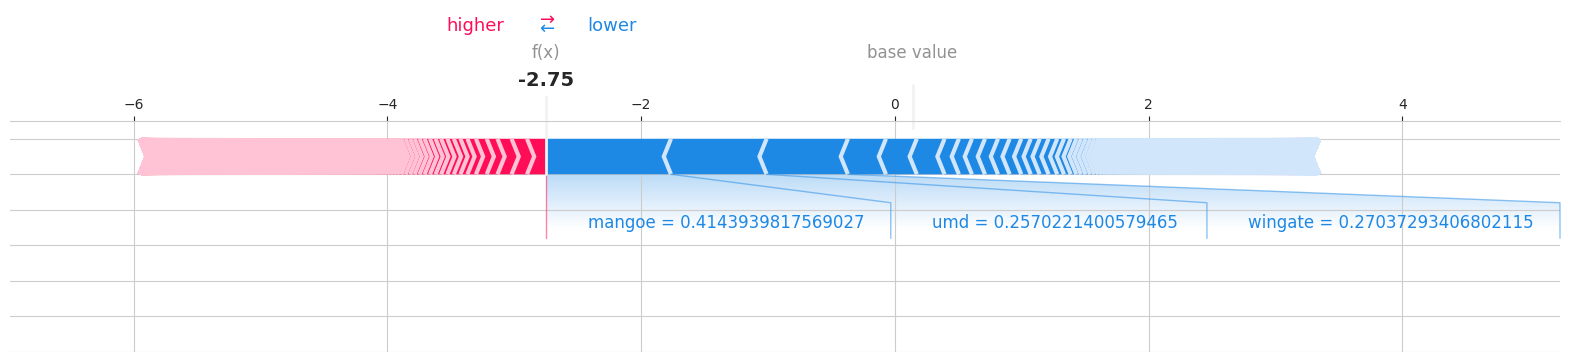


Document index: 94
Predicted label: christian
True label: atheism

From: bobbe@vice (Robert Beauchaine;6086;59-323;LP=A;YAyG)
Subject: More Best of A.A
Lines: 164



			RAPTURE - OCTOBER 28, 1992

		WHAT TO DO IN CASE YOU MISS THE RAPTURE

I. STAY CALM AND DO NOT PANIC

	Your natural reaction once you realize what has just occurred is to
panic.  But to do so is absolutely useless now.  If you had wanted to get right
with God before the rapture, you could have, but you chose to wait.  Now your 
only chance is to stay on this earth and to endure to the end of the 
Tribulation.  "But he that shall endure unto the end, the same shall be 
saved." - Matthew 24:13

II. REALIZE YOU ARE NOW LIVING DURING THE GREAT TRIBULATION

	The Great Tribulation is a seven year period starting from the time of
the rapture until Christ's second coming.  Also know as "the time of Jacob's
(Israel's) trouble" (Jere 30:7) and "Daniel's Seventieth Week" (Dan 9), this 
period will be unparalleled in trouble and h

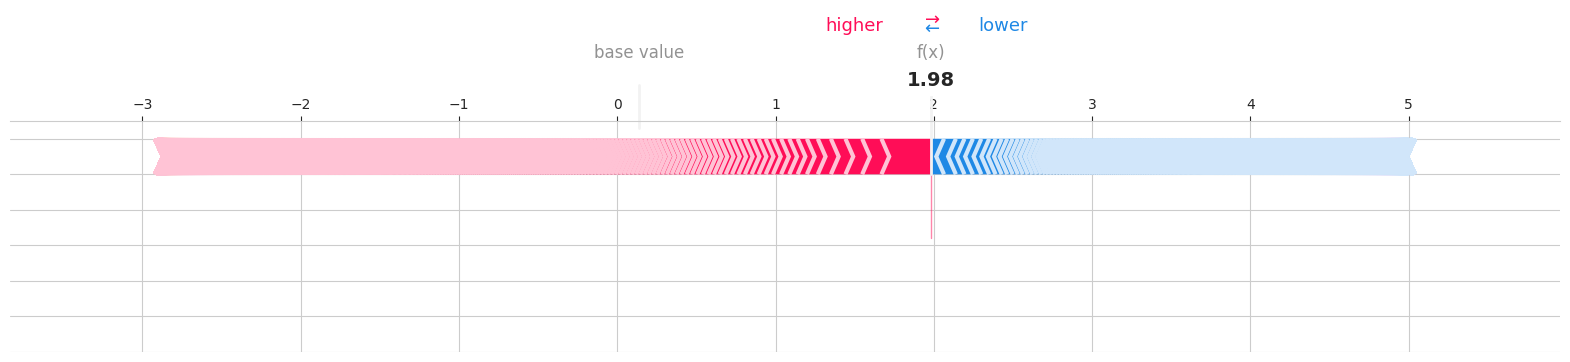


Document index: 256
Predicted label: christian
True label: christian

From: gilham@csl.sri.com (Fred Gilham)
Subject: Ontological argument
Organization: Computer Science Lab, SRI International, Menlo Park, CA.
Lines: 12

I read somewhere that Kurt Goedel argued that the ontological argument
for God's existence was logically reasonable (or something to that
effect).

Does anyone know if this is true, and have a citation?

Thanks.
--
-Fred Gilham    gilham@csl.sri.com
"Peace is only better than war when it's not hell too.  War being hell
makes sense."
               -Walker Percy, THE SECOND COMING



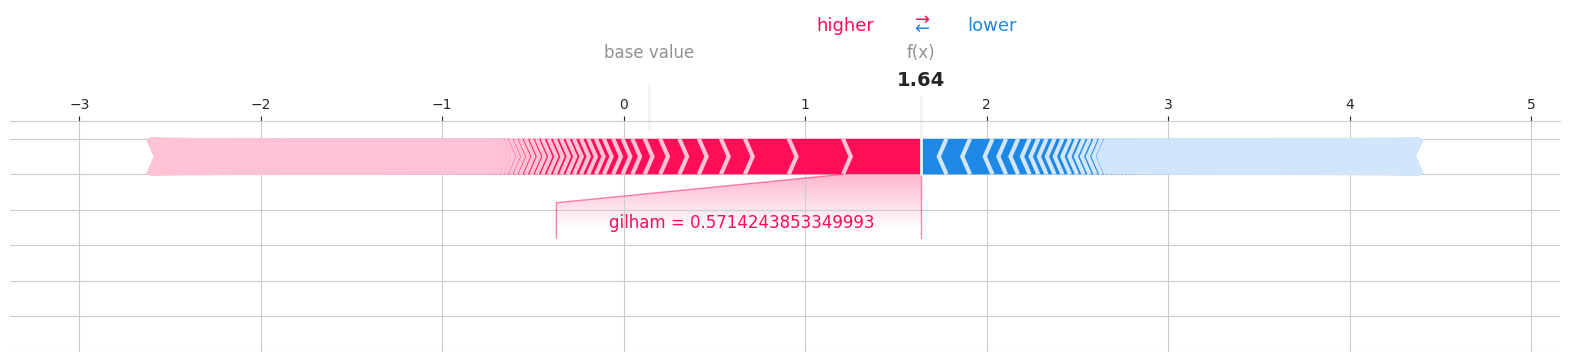


Document index: 389
Predicted label: christian
True label: christian

From: norris@athena.mit.edu (Richard A Chonak)
Subject: Re: hate the sin...
Reply-To: norris@mit.edu
Organization: l'organisation, c'est moi
Lines: 17

In article <May.16.01.56.47.1993.6695@geneva.rutgers.edu>, wjhovi01@ulkyvx.louisville.edu (Bill Hovingh, LPTS Student) writes:
|> scott@prism.gatech.edu (Scott Holt) writes:
|> > "Hate the sin but love the sinner" [...] My question is whether that
|> > statement is consistent with Christianity. I would think not.
|> 
|> I'm very grateful for scott's reflections on this oft-quoted phrase.  Could
|> someone please remind me of the Scriptural source for it? 

It's not scriptural, but comes from the patristic age, I think:
something about "amare errantem, interficere errorem", which sounds
more like "love the errant, slay the error".  No doubt someone else 
will know in particular who minted the phrase.  If I had to guess, I'd
blame :-)  St Augustine, who seems to have h

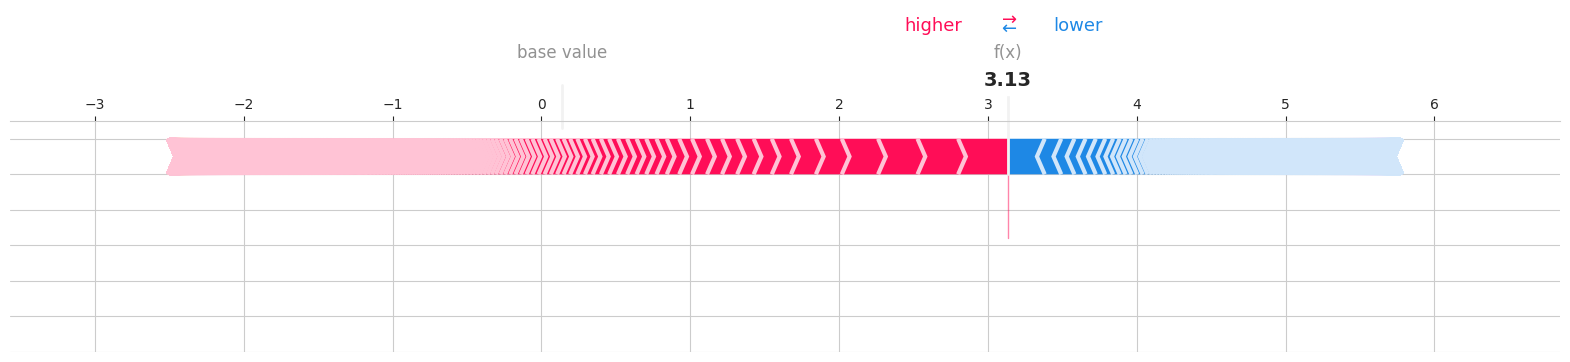


Document index: 554
Predicted label: christian
True label: christian

From: pduggan@world.std.com (Paul C Duggan)
Subject: Re: hate the sin...
Organization: The World Public Access UNIX, Brookline, MA
Lines: 30

In article <May.12.04.27.07.1993.9920@athos.rutgers.edu> scott@prism.gatech.edu (Scott Holt) writes:
>Hate begets more hate, never love. Consider some sin. I'll leave it unnamed
>since I don't want this to digress into an argument as to whether or not 
>something is a sin. Now lets apply our "hate the sin..." philosophy and see
>what happens. If we truly hate the sin, then the more we see it, the 
>stronger our hatred of it will become. Eventually this hate becomes so 
>strong that we become disgusted with the sinner and eventually come to hate
>the sinner.

Though you can certaily assert all this, I don't see why it necessarily
has to be the case. Why can't hate just stay as it is, and not beget more?
Who says we have to get disgusted and start hating the sinner. I admit
this

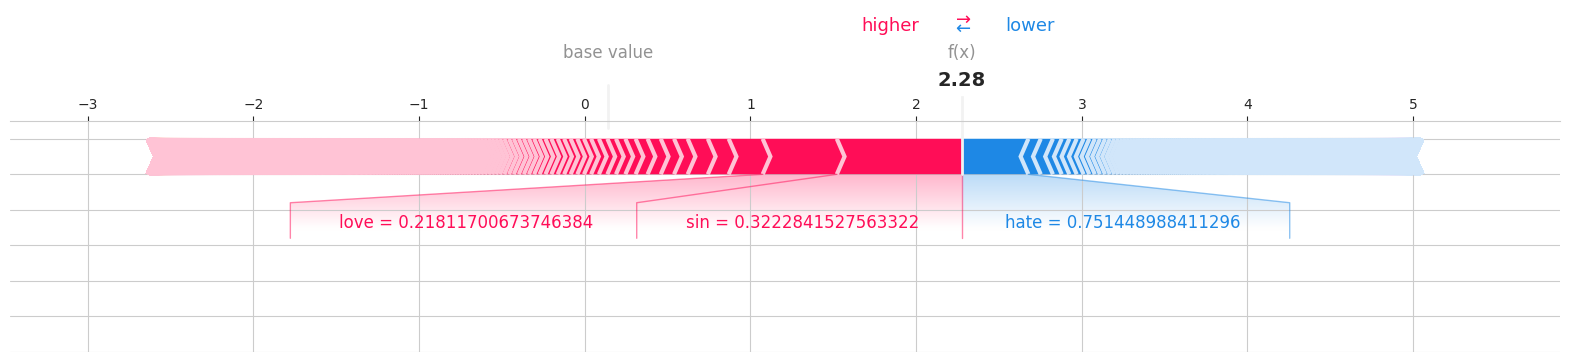

In [30]:
# Visually explain 5 documents selected from the test set

shap.initjs()
for idx in selected_idx:
    print(f"\nDocument index: {idx}")
    print(f"Predicted label: {class_names[y_pred[idx]]}")
    print(f"True label: {class_names[y_test[idx]]}\n")
    print(corpus_test[idx])

    shap.force_plot(
        explanation[idx].base_values,
        explanation[idx].values,
        explanation[idx].data,
        feature_names=vectorizer.get_feature_names_out(),
        matplotlib=True
    )

### Part (C)


#### Part (i)

In [88]:
# Compute the accuracy of the classifier and the number of misclassified documents
accuracy = sklearn.metrics.accuracy_score(y_pred, y_test)
misclassified_indices = np.where(y_test != y_pred)[0]
num_misclassified = len(misclassified_indices)
print("Accuracy of classifier:", accuracy)
print("Number of misclassified documents:", num_misclassified)

Accuracy of classifier: 0.9316596931659693
Number of misclassified documents: 49


#### Part (ii)

In [89]:
# Calculate conf_i for all misclassified documents

misclassified_idx = np.where(y_pred != y_test)[0]
conf_i = [np.abs(np.diff(y_prob[i])[0]) for i in misclassified_idx]

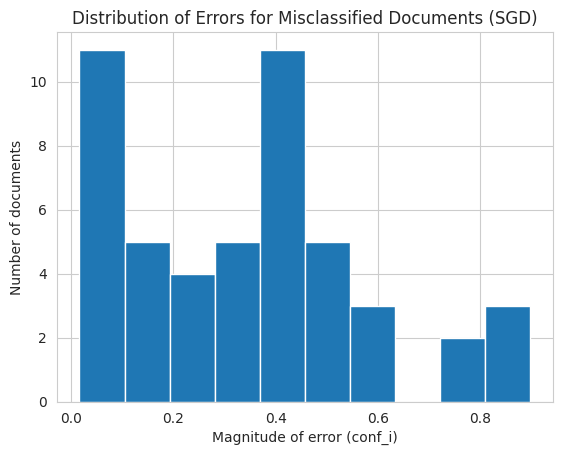

In [90]:
# Plot conf_i
plt.hist(conf_i)
plt.xlabel('Magnitude of error (conf_i)')
plt.ylabel('Number of documents')
plt.title('Distribution of Errors for Misclassified Documents (SGD)')
plt.show()

#### Part (iii)

In [91]:
# Identify tokens (word_j) that contributed to the misclassification of documents
feature_names = vectorizer.get_feature_names_out()

word_j = defaultdict(lambda: [0, 0])

for idx in misclassified_idx:
  shap_vals = explanation.values[idx, :]

  for word, shap_val in zip(feature_names, shap_vals):
    if (y_pred[idx] == 0 and shap_val < 0) or (y_pred[idx] == 1 and shap_val > 0):
      # Compute the number of documents (called count_j) these words helped to misclassify
      word_j[word][0] += 1
      # Compute the sum of absolute values of weight_j for each word_j
      word_j[word][1] += np.abs(shap_val)

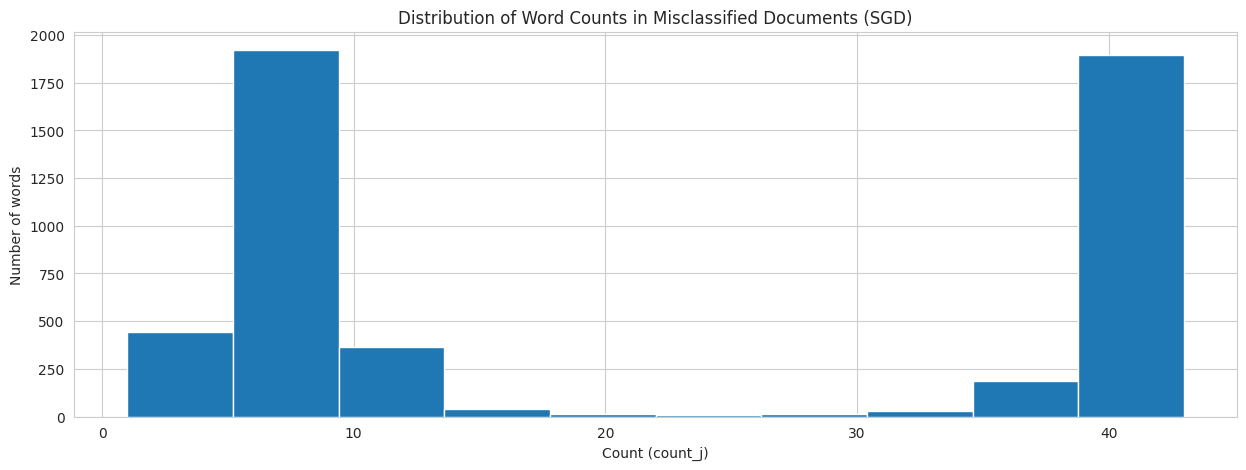

In [92]:
# Compute the number of documents (count_j) these words helped to misclassify
plt.figure(figsize = (15, 5))
plt.hist([val[0] for val in word_j.values()])
plt.xlabel('Count (count_j)')
plt.ylabel('Number of words')
plt.title('Distribution of Word Counts in Misclassified Documents (SGD)')
plt.show()

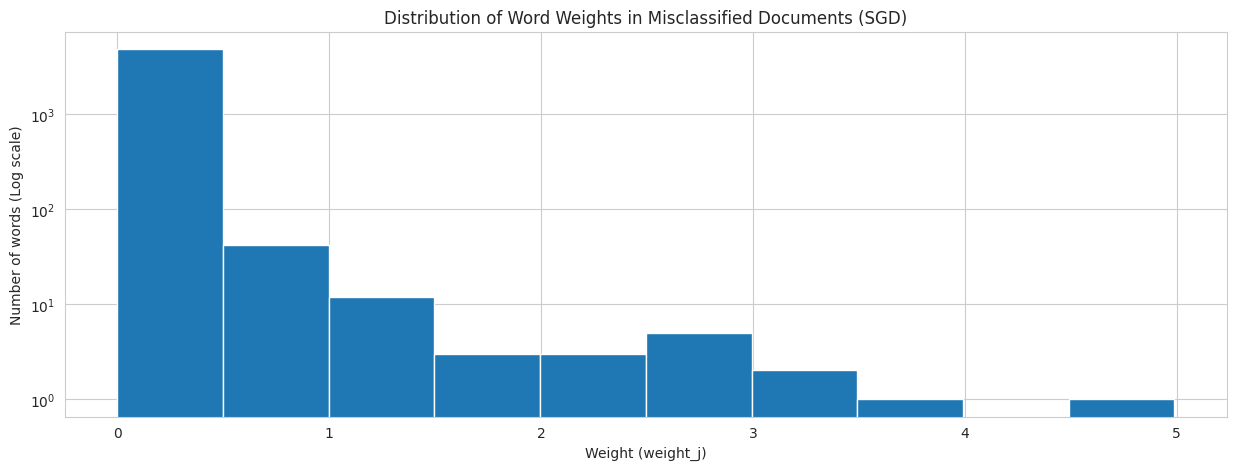

In [93]:
# Compute the sum of absolute SHAP values (weight_j) for each word_j
plt.figure(figsize = (15, 5))
plt.hist([val[1] for val in word_j.values()], log = True)
plt.xlabel('Weight (weight_j)')
plt.ylabel('Number of words (Log scale)')
plt.title('Distribution of Word Weights in Misclassified Documents (SGD)')
plt.show()

### Part (D)

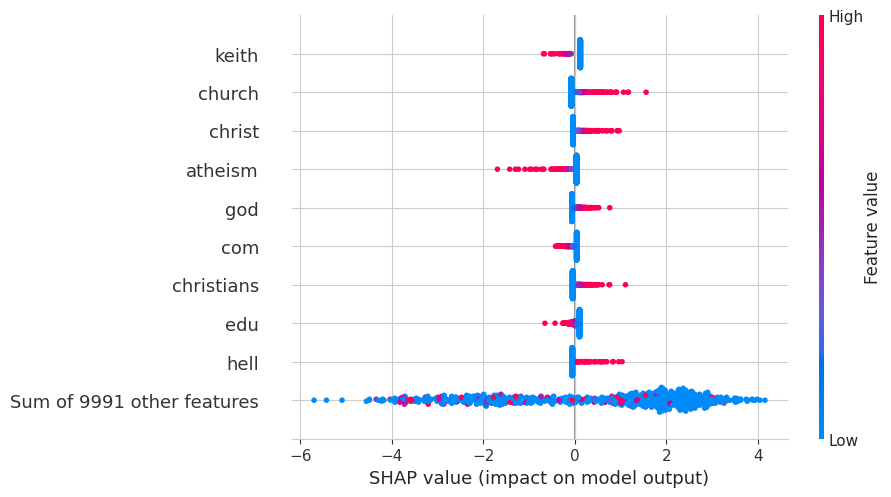

In [94]:
# Implement a strategy for feature selection
shap.plots.beeswarm(explanation)

In [110]:
# first step: identifying noisy or misleading features (words) from count_j
tokens_to_remove = set([word for word, (count, _) in word_j.items() if count > 10])

# step 2: filtering out these features from the vectorizer’s feature list
all_features = np.array(vectorizer.get_feature_names_out())
mask = np.array([word not in tokens_to_remove for word in all_features])

# step 3: applying this mask to X_train and X_test
X_train_filtered = X_train[:, mask]
X_test_filtered = X_test[:, mask]

# step 4: training classifier using filtered features
from sklearn.linear_model import SGDClassifier
filtered_model = SGDClassifier(loss='log_loss', random_state=22)
filtered_model.fit(X_train_filtered, y_train)

# step 5: evaluating performance
y_pred_filtered = filtered_model.predict(X_test_filtered)
accuracy_filtered = sklearn.metrics.accuracy_score(y_test, y_pred_filtered)
misclassified_filtered = np.sum(y_pred_filtered != y_test)

# comparing with original
print(f"Original Accuracy:", accuracy)
print(f"Original Misclassified:" , num_misclassified)

print(f"\nFiltered Accuracy: {accuracy_filtered}")
print(f"Filtered Misclassified: {misclassified_filtered}")


Original Accuracy: 0.9316596931659693
Original Misclassified: 49

Filtered Accuracy: 0.9442119944211994
Filtered Misclassified: 40


In [112]:
# Identify at least one example that was misclassified before feature selection and that is classified correctly after feature selection
# saving original predictions
old_y_pred = y_pred

# indentifying one document that was misclassified before but corrected after
misclassified_before = np.where(old_y_pred != y_test)[0]
misclassified_after = np.where(y_pred_filtered != y_test)[0]
fixed_indices = np.setdiff1d(misclassified_before, misclassified_after)

print("Indices of documents only correctly classified after feature selection:", fixed_indices)

Indices of documents only correctly classified after feature selection: [  1  25  38  99 109 110 123 126 134 156 164 197 216 245 293 366 377 399
 406 419 442 447 460 461 469 514 531 558 568 581 591 605 606 615 658 668
 677 679 683 685 694 703]


Before Feature Selection - Document index: 1
Predicted label: atheism
True label: christian

From: tdarcos@access.digex.net (Paul Robinson)
Subject: Homosexuality is Immoral (non-religious argument)
Organization: Tansin A. Darcos & Company, Silver Spring, MD USA
Lines: 43

[This was crossposted to a zillion groups.  I don't intend to
carry an entire discussion crossposted from alt.sex, particularly
one whose motivation seems to be having a fun argument.  However
I thought readers might be interested to know about the
discussion there.  --clh]

I intend to endeavor to make the argument that homosexuality is an
immoral practice or lifestyle or whatever you call it.  I intend to
show that there is a basis for a rational declaration of this
statement.  I intend to also show that such a declaration can be 
made without there being a religious justification for morality,
in fact to show that such a standard can be made if one is an atheist.

Anyone who wants to join in on the fun in taking t

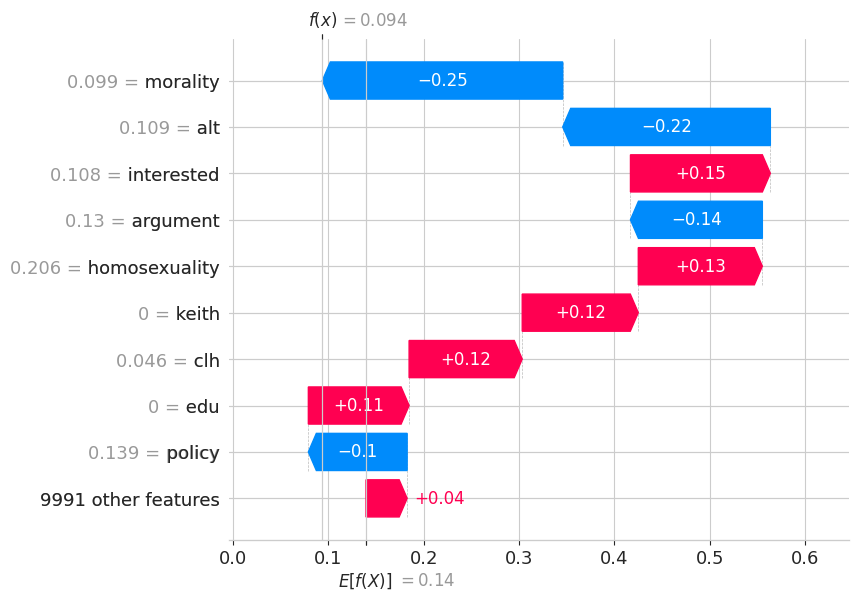

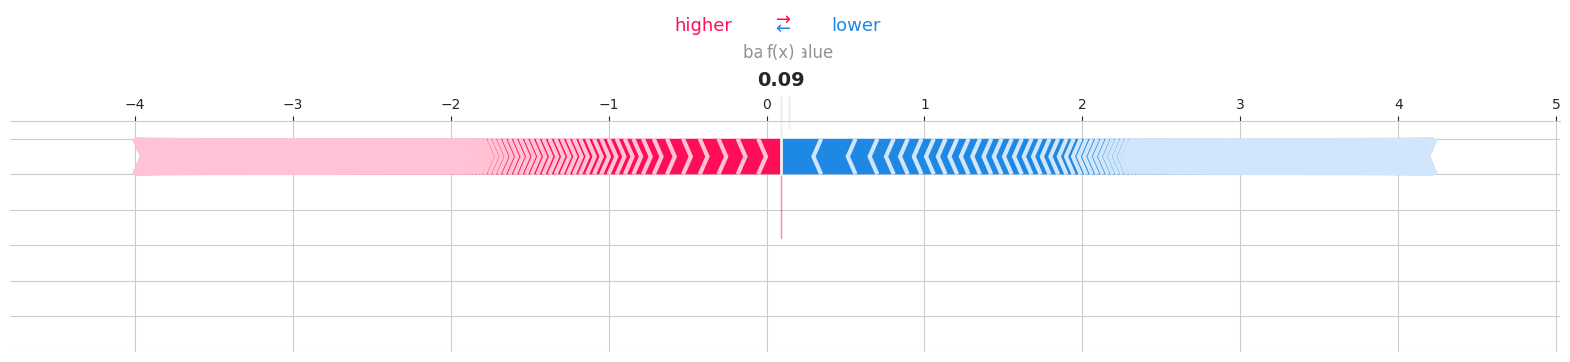

In [119]:
# SHAP explanation for the fixed document
idx = fixed_indices[0]  # picking the first one

shap.initjs()
print(f"Before Feature Selection - Document index: {idx}")
print(f"Predicted label: {class_names[old_y_pred[idx]]}")
print(f"True label: {class_names[y_test[idx]]}\n")
print(corpus_test[idx])

shap.plots.waterfall(explanation[idx])

shap.force_plot(
    explanation[idx].base_values,
    explanation[idx].values,
    explanation[idx].data,
    feature_names=vectorizer.get_feature_names_out(),
    matplotlib=True
)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)



AFTER Feature Selection — Document index: 1
Predicted: christian
True: christian

 From: tdarcos@access.digex.net (Paul Robinson)
Subject: Homosexuality is Immoral (non-religious argument)
Organization: Tansin A. Darcos & Company, Silver Spring, MD USA
Lines: 43

[This was crossposted to a zillion groups.  I don't intend to
carry an entire discussion crossposted from alt.sex, particularly
one whose motivation seems to be having a fun argument.  However
I thought readers might be interested to know about the
discussion there.  --clh]

I intend to endeavor to make the argument that homosexuality is an
immoral practice or lifestyle or whatever you call it.  I intend to
show that there is a basis for a rational declaration of this
statement.  I intend to also show that such a declaration can be 
made without there being a religious justification for morality,
in fact to show that such a standard can be made if one is an atheist.

Anyone who wants to join in on the fun in taking the other 

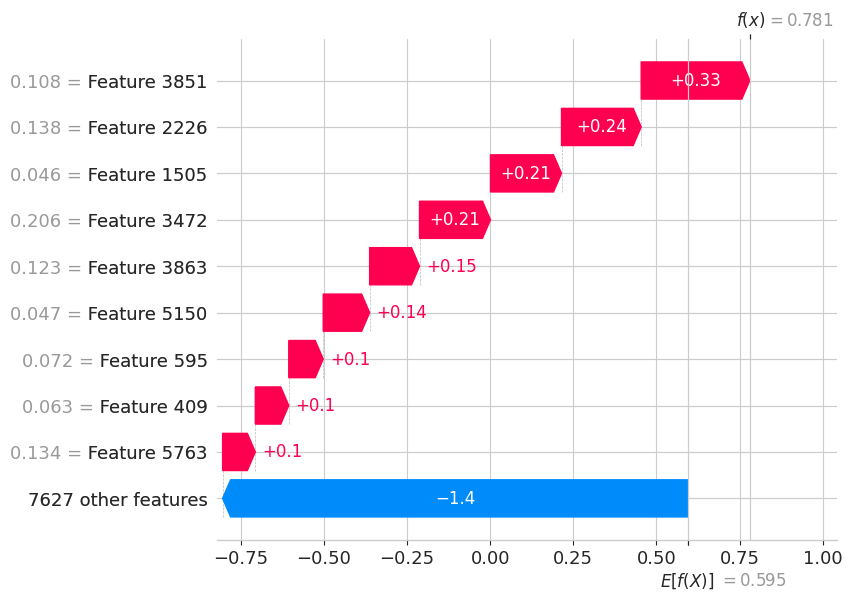

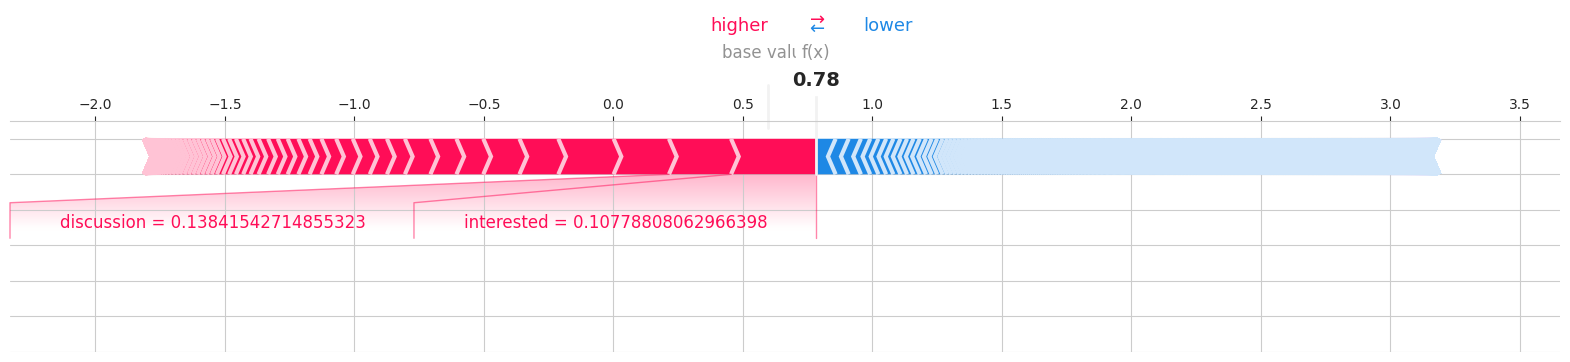

In [121]:
explainer_filtered = shap.LinearExplainer(filtered_model, X_train_filtered, feature_perturbation="interventional")
explanation_filtered = explainer_filtered(X_test_filtered)

shap.initjs()
print(f"\nAFTER Feature Selection — Document index: {idx}")
print(f"Predicted: {class_names[y_pred_filtered[idx]]}")
print(f"True: {class_names[y_test[idx]]}")
print("\n", corpus_test[idx])

shap.plots.waterfall(explanation_filtered[idx])

shap.force_plot(
    explanation_filtered[idx].base_values,
    explanation_filtered[idx].values,
    explanation_filtered[idx].data,
    feature_names=vectorizer.get_feature_names_out()[mask],  # Filtered feature names
    matplotlib=True
)